# Bookchapter Tutorial
A collection of code from the Infrared RNA design bookchapter

------------------------------------------------------------

## Online resources and software environment

​

This document is hosted online as [Jupyter notebook](https://www.lix.polytechnique.fr/~will/Software/Infrared/current/Doc/Bookchapter.ipynb) with precomputed results. Download this file to view, edit and run it in Jupyter.

​

We recommend to install all required software using Mamba (or Conda) and PIP.

```

mamba create -n infrared -c conda-forge infrared jupyter jupytext matplotlib seaborn graphviz logomaker

mamba activate infrared

# optionally install the Vienna RNA package (only Linux or MacOS)
mamba install -c conda-forge -c bioconda viennarna

pip install graphviz

mamba deactivate infrared

```

​

Start the Jupyter notebook server after activating the environment

```

mamba activate infrared

jupyter notebook

```

The [original sources](https://gitlab.inria.fr/amibio/Infrared/-/tree/master/Doc/Tutorials) are part of the Infrared distribution and hosted on Gitlab (in Jupytext light Script format).

​

------------------------------------------------------------

## Disclaimer
This notebook contains code for the examples from the bookchapter ["Developing complex RNA design applications in the Infrared framework"](https://hal-lirmm.ccsd.cnrs.fr/X-LIX/hal-03711828v2)
by Hua-Ting Yao, Yann Ponty, and Sebastian Will.

This document should be used **in parallel to the bookchapter**.


The main purpose of this notebook is to allow readers of the chapter to easily run examples and possibly experiment with the code. Code is therefore given in the same order as in the bookchapter and under corresponding section titles. In turn, the notebook contains almost no explanations, as these are given in the manuscript.

Compared to the code given in the chapter, we extended some code to make it even more illustrative, e.g. by plotting results. Finally, we provide code to generate figures of the bookchapter in the Appendix.


## 1 Introduction

In [1]:
#[Intro]
import infrared as ir
import infrared.rna as rna

In [2]:
import matplotlib.pyplot as plt

In [3]:
target = "((((((((((...))))((((....))))))))))"
model = ir.Model(len(target), 4)
model.add_constraints(rna.BPComp(i, j) for (i, j) in rna.parse(target))
sampler = ir.Sampler(model)
samples = [sampler.sample() for _ in range(10)]

In [4]:
sequences = [rna.ass_to_seq(x) for x in samples]
sequences

['GCAGUUGGAGCAGUUUUGCGAGGUUUCGCAACUGC',
 'CCGUGGGGCUUGAGGUUUCUCAAUGGGGAUUACGG',
 'UGGUGGUGGGCCUCCCAUUAAAUUCUUAGUUGCUA',
 'CUGUCACGUUCUCAGCGAAUAAAUAUAUUUGGUAG',
 'CGUUUGGAUUACAAGUUAAGUAAGAAUUUUAGGCG',
 'UCGAGGAAUUUGGAAUUGUAGUCUGUUAUCUUCGG',
 'AGCGUACGGCGCAGCUGCCGAGUCGUCGGUGUGCU',
 'AAGGUUGGGACCGUUCUGGGAGGAUUCCCAGCUUU',
 'GGAGGAAUGACUAUCGUGGGAUUUUUCCUUCCUUC',
 'ACGGUGACCGCUUCGGUUGUCGCUUGGCGUACUGU']

We are going to visualize the nucleotide frequencies of the sampled sequences 
if module ```logomaker``` is availabe.
(e.g. install by ```conda install logomaker```)

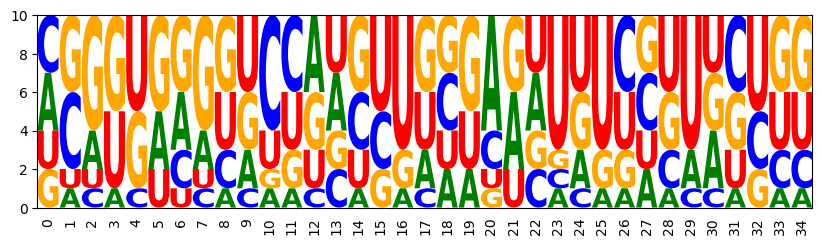

GCAGUUGGAGCAGUUUUGCGAGGUUUCGCAACUGC
CCGUGGGGCUUGAGGUUUCUCAAUGGGGAUUACGG
UGGUGGUGGGCCUCCCAUUAAAUUCUUAGUUGCUA
CUGUCACGUUCUCAGCGAAUAAAUAUAUUUGGUAG
CGUUUGGAUUACAAGUUAAGUAAGAAUUUUAGGCG
UCGAGGAAUUUGGAAUUGUAGUCUGUUAUCUUCGG
AGCGUACGGCGCAGCUGCCGAGUCGUCGGUGUGCU
AAGGUUGGGACCGUUCUGGGAGGAUUCCCAGCUUU
GGAGGAAUGACUAUCGUGGGAUUUUUCCUUCCUUC
ACGGUGACCGCUUCGGUUGUCGCUUGGCGUACUGU


In [5]:
def draw_logo(samples,name=None):
    import logomaker as lm
    
    sequences = [rna.ass_to_seq(x) for x in samples]
    
    matrix = lm.alignment_to_matrix(sequences = sequences)
    logo = lm.Logo(matrix)
    logo.style_xticks(rotation=90, fmt='%d', anchor=0)
    logo.ax.xaxis.set_ticks_position('none')
    if name is not None:
        plt.savefig(name)
    plt.show()
    logo.ax.xaxis.set_tick_params(pad=-1)
    return sequences

def opt_draw_logo(samples,name=None,num=10):
    try:
        draw_logo(samples,name)
    except ModuleNotFoundError as e:
        print(e)
    for x in samples[:num]:
        print(rna.ass_to_seq(x))
    if len(samples)>num:
        print("...")

def assignments_to_seqs(xs):
    return [rna.ass_to_seq(x) for x in xs]

opt_draw_logo(samples)

### Multiple targets

In [6]:
#[Multiple_targets]
targets = ["((((((((((...))))((((....))))))))))",
           "((((((.((((((((....))))..))))))))))",
           ".((((((...)))))).(((((((....)))))))"]

In [7]:
for target in targets:
    model.add_constraints(rna.BPComp(i, j) for (i, j) in rna.parse(target))

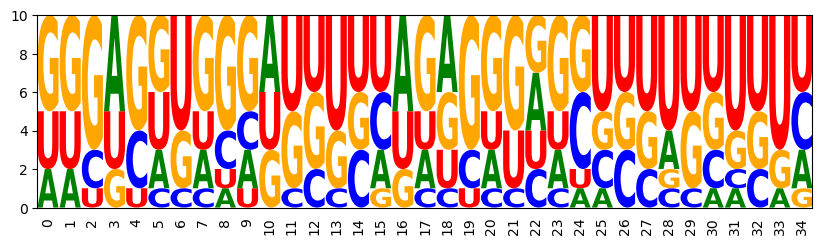

GGGACAUAGGAUGUCUGGAGAUGGCUCUUUGUCUC
UUCUGAGUCCUUCGGAUUUUCGAUGGGGAUUGGGA
UUCUGUGUCUUGCGGAUUCCUGCUUGGGAGUAGGA
AGGAGGUGGGAUUUCCAGGGGGAAGUCCUUCUUUU
GGGAGUUGGAAGUUUUAAGGGGUGAUUUUGUUUUU
AAGGGUUAGAGGUUUUAAGGGGUACUUCUGUCCUU
GAGACGUGGGGUGUUUAGAGGUAGGCUUUUGUUUC
UUUUGGGCUCUCUGGGUCUCUGGCCAGGGUCGGAG
GGGGUCCGAGGGGCUCGGAGGUCGCCUUCGAUUUC
GGGACGUGGGAUGUCCAGAGACGGGUCUUCGUUUU


In [8]:
sampler = ir.Sampler(model)
designs = [sampler.sample() for _ in range(10)]

samples = [x for x in designs]
opt_draw_logo(samples)

In [9]:
#[Multiple_targets-bpenergy]
for target in targets:
    model.add_functions([rna.BPEnergy(i, j, False) for (i, j) in rna.parse(target)], 'energy')

## 3 Methods

### 3.1 Elementary use of Infrared - A simple design model

In [10]:
#[3.1]
n = 35

In [11]:
model = ir.Model(n,4)

In [12]:
target = "((((((((((...))))((((....))))))))))"
model.add_constraints(rna.BPComp(i, j) for (i, j) in rna.parse(target))

In [13]:
sampler = ir.Sampler(model)

In [14]:
samples = [sampler.sample() for _ in range(10)]

In [15]:
sequences = [rna.ass_to_seq(sample) for sample in samples]

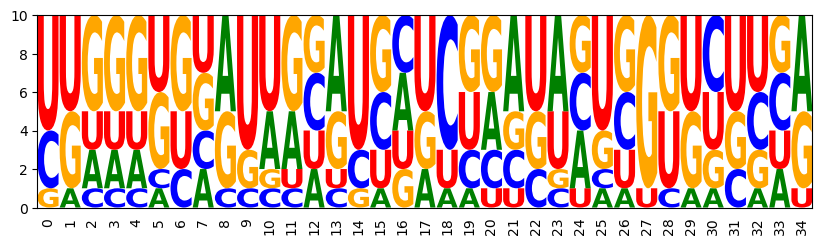

CUGUGGGGAGUAUCUCUGCGCCGUAGCGCUCGCGG
UGGGGUUAGUGUUGCUAUCUGGUACCGGGGCUCCA
UGGGGUUCAUAGGAUGAUCAAAUAAUUGGGUUCUA
CUAAUUCGAUCCGAUCGACGAAGGCUCGUGAUUAG
UUUGGGGAGUUAAACUUUUUGGUUGUGGGUCCAGG
GGUGGUGCGGAGAUUGCGACUAGUGAGUUACCGCU
CGGGAGCUAUUGGAUAGACUGUUAUUAGUUUUUCG
UAAUAAGUCCAGCGGGCGCGGACACUCGUUUGUUA
UUGCCCUGGUUGCGUCAUUCCCCAAGGGGGGGUGA
UUCAUGGUAUUACAUGCUCGAAUCGUUGGUGUGAA


In [16]:
opt_draw_logo(samples)

### 3.2 Sequence constraints in IUPAC code

In [17]:
#[3.2]
iupac_sequence = "SNNNNNNNNNRYYNNNNNNNNGNRANNNNNNNNNS"

In [18]:
for i, x in enumerate(iupac_sequence):
    model.add_constraints(ir.ValueIn(i, rna.iupacvalues(x)))

In [19]:
sampler = ir.Sampler(model)

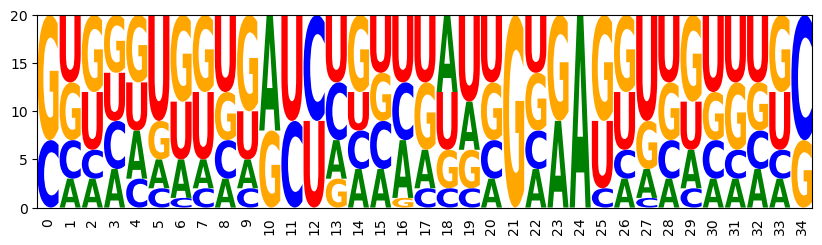

CUACAUUCCGGUCCGGAUUUUGGGAGGGAAUGUGG
CUCUAGUGUGAUUCGCAGUGCGAGAGCGUCUAGAG
CGUUGUAUUUAUCGGGUCUUUGUAAGGAGGUGGCG
CGGGUGGGGGACCCCCUACGAGUAAUCGUCAUUCG
CGGGGUUGCUGUUAGUACAAGGCGAUUUGAUUCUG
GUGGUGAGUGAUCUACUUAACGAGAGUUGUGCCGC
GGACCUUUAAGCUUUAAGUUAGCAAUGACGGGUCC
GUUAGUUUAGACCUUGAUAUAGGGAUGUGGCUGAC
GAGGCUGACUAUUAGUCAACUGGGAGGUUAGCCUC
GAUCAUUUCUACUAGAAGGAUGUGAGUUUGUGAUC
...


In [20]:
samples = [sampler.sample() for _ in range(20)]

opt_draw_logo(samples)

### 3.3 Control of GC content

add functions for GC control:

In [21]:
#[3.3]
model.add_functions([rna.GCCont(i) for i in range(n)], 'gc')

set a weight and sample

In [22]:
model.set_feature_weight(1, 'gc')
sampler = ir.Sampler(model)
samples = [sampler.sample() for _ in range(1000)]

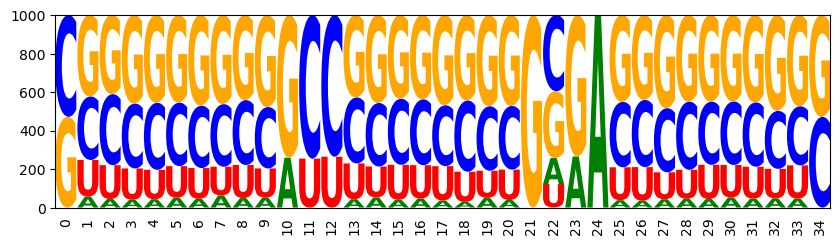

CUGGGCGAGCGUCGCUCUAGGGGGACCUGGCCCAG
GGCCGGGGGUGCCGUCCGGCCGGGAGGCCCCGGUC
GGUUUGUCGGAUCUCGGGUCGGCGAUGACCAGGCC
CGGUGCGAUUGCUGGUCUGCUGGAAAGCGGCGCCG
GGACCCCCGCGCCGUGGCCUUGCGAGAGGGGGUUC
CCCGCCCGGAGUCUCUGUCCCGGGAGGGGGGCGGG
CGCCGCUUCGGCUCGGGGAGGGUAACCUCGUGGCG
CGCCGGCCCGGCUUGGGCGGCGGAAGCCGCCGGCG
GCGGGGGUGUGCUACACCCCAGAGAUGGGCCCCGC
CGCCGGCCGGACUUUGGGGGGGCGACCCCUCGGUG
...


In [23]:
opt_draw_logo(samples)

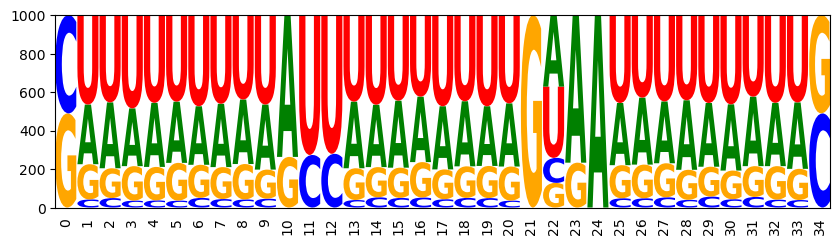

CAUAAUUUUUGUUAAAAGUGAGGAAUUACAUUAUG
GUAAUUUGAUACUGUUGAUAUGUGAAUAUAAUUGC
CUUCUUUAUUAUCAAUGUAUAGAAAUAUAAAGGAG
GGUAGAUAUAGUCUGUAAUAUGAAAAUAUUCUAUC
GUUUAUUCGAAUUUUGGAAUUGAAAAAUUGUAGAC
CUCAGUAAGAAUUUUUUUUUUGUAAAAAAAUUGAG
CUUCUAGUAUAUCAUAUUAUAGGAAUGUAUAGAGG
CUUAAAAUAUAUUAUAUAGUUGGAAGAUUUUUGAG
CUUUUAAUUAAUUUAAUUAUUGUAAAAUAUAAAAG
CUUUUGUUUUGUUAAGGAAAUGUAAAUUUCGAAAG
...


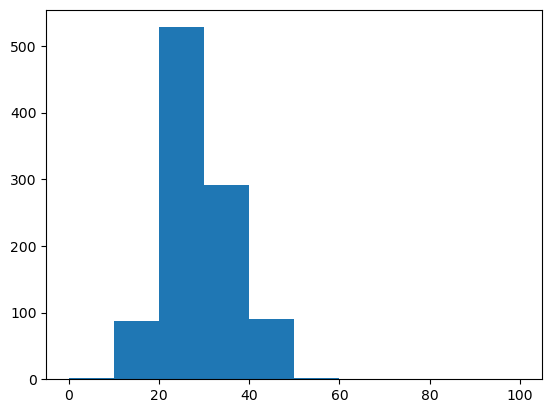

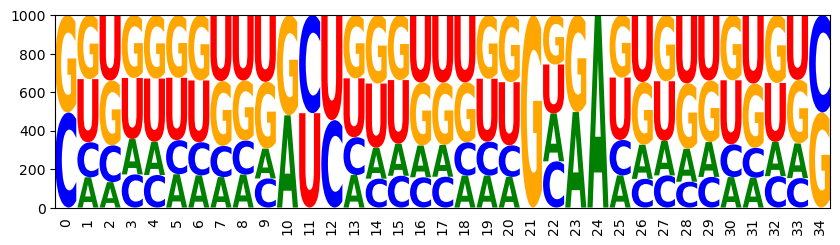

GCUAGAUGGUGCCACUGGAGUGAAAGCUUUCUGGC
CACAGAAGUUGCCAGUUUCCGGUGAUGGAUCUGUG
CAGUGACUCGACCUGGGGACGGCAAUGUUUUACUG
CUCAACUCAGAUCCUGAUUAGGAAACUAAGUUGGG
CUGCUUGGACGUCGUUUUCUCGGGAGAGGAGGUAG
GAAUAGGCGGACUUUGCUGCCGUAAGGCGUUAUUC
GUUUCGGUGGAUCCUGUAAAGGAGAUUUUCGGAAC
CGGCUUGGGUGUCGUUUGAGUGGAAAUUCAGGUUG
GGGACUGGGGACCCUUUUUGCGAGAGUAAAGUCUC
GGUGACCGUUACCAACGGCCGGCGAUGGUGUUGCC
...


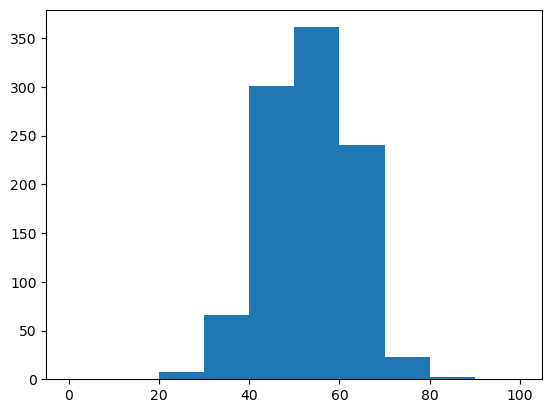

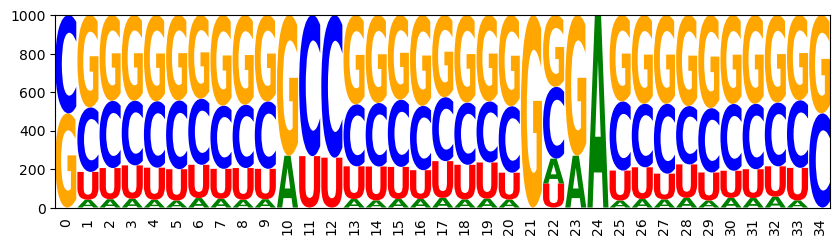

GCAUAUCGCGACCCGCGCGUGGGGACACGAUGUGC
GGCAUAGCGCGCCGUGCUGCCGCAAGGUGUAUGCC
CGGCGCGUCGACCCGACCUGCGGAAGCGGGCGCCG
CGCGCUGGGGGCCCUCCCCGAGGGAUCGGAGCGCG
CUGGUGGGUGGUCCACUUGGCGUGAGCCGCGCCGG
CGGGGGCCGGGCCCCGGCGCCGUGAGGUGCUUCCG
CCGGGGGGCCGCCGGCCGGGUGUGAGCCCCCCCGG
CGCGCCGCGGGCUCCGCUCGCGAGAGCGAGGUGCG
GGUGCGCGGGGUCCCCGGCCGGAGAUGGCUGUACC
GCCGUGGGGGACCUCCCGUGCGCGAGCACUGUGGC
...


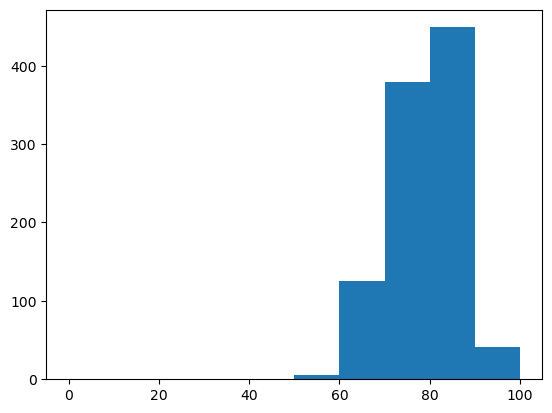

In [24]:
## Code to produce the figures in the paper
WRITEFIGS = False
for name,weight in [('minus', -1), ('zero', 0), ('plus', 1)]:
    
    model.set_feature_weight(weight, 'gc')
    sampler = ir.Sampler(model)
    samples = [sampler.sample() for _ in range(1000)]

    opt_draw_logo(samples, f"gc_content_{name}-logo.svg")
    sequences = assignments_to_seqs(samples)

    gc_contents = [100*sum(x in "GC" for x in sequence)/len(sequence) for sequence in sequences]
    h = plt.hist(gc_contents,bins=10,range=(0,100))
    if WRITEFIGS:
        plt.savefig(f"gc_content_{name}-hist.svg")

Set a target of 75% GC content and then draw targeted samples

In [25]:
#[3.3.3]
sampler = ir.Sampler(model)
sampler.set_target( 0.75 * n, 0.01 * n, 'gc' )
samples = [sampler.targeted_sample() for _ in range(1000)]

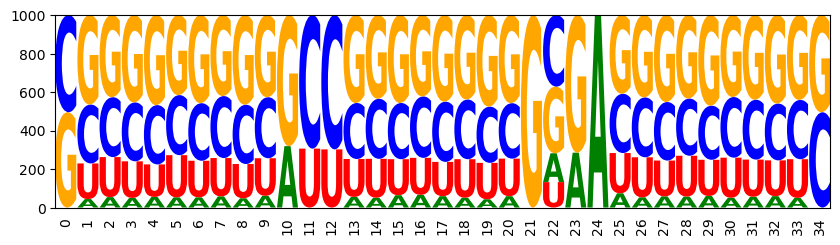

CCCAGGGGGGACCCUCCGUCGGCGACGACUUUGGG
GCGGGCGUGGAUCCCGCCCGUGCGAAUGGGCUUGC
GGUUCCAACUGCUGGUUGCGGGGGACCGCGGGGCC
GCCAGUCGGGACCUCCGGGGGGCAAUUCCGCUGGC
GGCGUUGGGGGUCUUUCCCGUGCGAGCGGGGCGUC
GGGGCGCCGUACUGCGGGUUGGCAACGGUCGCUCC
CCGGACUUGGAUCUCGACCGGGGGACCGGGUCCGG
GCCGCGCUAUGCCGUGGGUGCGCAAGUGUCGCGGC
GGGGUCCUUAGCUUAGGCCCUGGGAGGGGGGCCCC
GCUUCGGGUCGCUGACCGCACGCAAGUGCCGGGGC
...
GC content in samples: 74.29%


In [26]:
opt_draw_logo(samples)
sequences = assignments_to_seqs(samples)

gc_contents = [100*sum(x in "GC" for x in sequence)/len(sequence) for sequence in sequences]
gc_content = sum(gc_contents) / len(gc_contents)
print(f"GC content in samples: {gc_content:0.2f}%")

### 3.4 Controlling energy - Multiple features

In [27]:
#[3.4]
model = ir.Model(n,4)
bps = rna.parse(target)
model.add_constraints(rna.BPComp(i, j) for (i, j) in bps)
model.add_functions([rna.GCCont(i) for i in range(n)], 'gc')

add (base pair) energy control

In [28]:
model.add_functions([rna.BPEnergy(i, j, (i-1, j+1) not in bps)
                     for (i, j) in bps], 'energy')

target specific GC and low energy

In [29]:
model.set_feature_weight(-2, 'energy')
sampler = ir.Sampler(model)
sampler.set_target(0.75*n, 0.01*n, 'gc')
samples = [sampler.targeted_sample() for _ in range(10)]

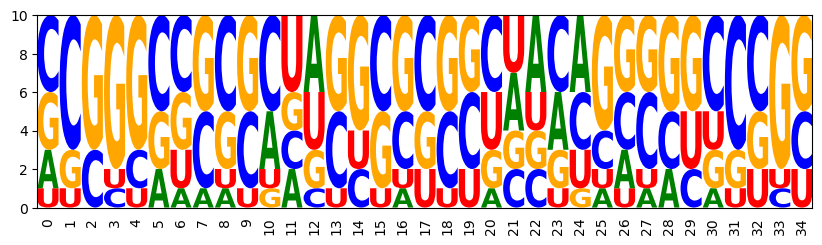

CCGGGCUCCGAGUCGGGCUGGCUAUCCAGGCCUGG
GCCGGGCGCUCUAGGCGCCUCGACUGAGGUUCGGC
CCGGGGCGUGAACCGCGUCCUUCCAGGGACUCCGG
GCGGCCACCCCGUGGGUGGGUUAACAUCCGGCCGC
CCGGGCCGGGCAAUCCGUGCCAGAAGGCAGCCUGG
AGCGCACCACUCGGUGGGGGCCGCCGCUCUGUGCU
AGGUGCUGCGGCUCGCACGGCACCAGCCGGCGCUU
GCGCUAGCGCCUAGCGCCGCGAAUCCGCGUAGCGC
CCGGGGGGCCAUGGGCCCCUAUUGAUAGGCCCCGG
UUCGGCGAGGCUACUUCGCCUGAGGGGGCGCCGGG


In [30]:
opt_draw_logo(samples)

add stacking energy control - this could be used in place of defining base pair energyin the code above

In [31]:
#[stackenergy]
model.add_functions([rna.StackEnergy(i, j)
    for (i,j) in bps if (i+1,j-1) in bps], 'energy')

### 3.5 Targeting Turner energy - Customized features

*Note:* From this point on, we require RNA energy evaluation based on the Vienna RNA library. Under Mac and Linux, the functionality is accessed via module RNA of the library. Since, this is typically unavailable on Windows, we provide a work around.

In [32]:
#[3.5]
try:
    from RNA import energy_of_struct
except:
    print("*Warning*: the RNA Python bindings cannot be imported.\n\n"
          "For Linux and MaxOS it is recommened to install viennarna via conda. "
          "Windows users are asked to install the Vienna package using the provided Windows installer "
          "and make sure that the command line tool RNAeval is found based on their search path."
         )
    def energy_of_struct(seq,struct):
        try:
            import subprocess
            import re
            p = subprocess.run(["RNAeval"], input=f"{seq}\n{struct}".encode('utf-8'), capture_output=True)
            m = re.search(r'([0-9-.]*)\)$',p.stdout.decode('utf-8').split('\n')[1])
            res = float(m[1])
        except Exception as e:
            print(f"Cannot evaluate energy of {seq}, {struct}")
            raise e
        return res

In [33]:
# Restate current model
model = ir.Model(n,4) 
bps = rna.parse(target)
model.add_constraints(rna.BPComp(i, j) for (i, j) in bps)
model.add_functions([rna.GCCont(i) for i in range(n)], 'gc')
model.add_functions([rna.BPEnergy(i, j, (i-1, j+1) not in bps)
                     for (i, j) in bps], 'energy')

add the Turner energy feature

In [34]:
model.add_feature('Energy', 'energy',
    lambda sample, target=target:
        energy_of_struct(rna.ass_to_seq(sample), target))

specify targets and draw targeted samples

In [35]:
sampler = ir.Sampler(model)
sampler.set_target(0.75*n, 0.05*n, 'gc')
sampler.set_target(-10, 0.5, 'Energy')
samples = [sampler.targeted_sample() for _ in range(10)]

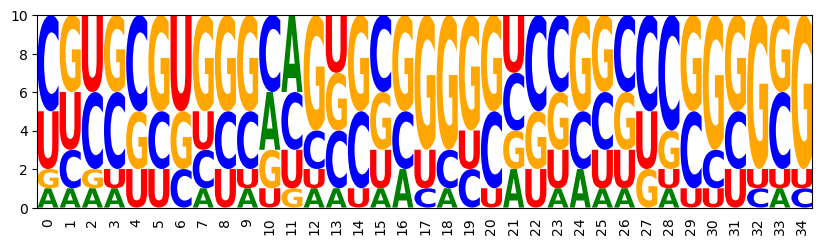

CUACGUGCGGAAGCCGCGCGCUGCAGCGCGUGUGG
GGCCGCUUGGUGGUCAGUGGGGGUCCCUGGCGGCC
CGCCUGCGCUGACAGUGGCUGCUCGCAGCUGGGCG
CCUGCGUGGCCCGGCCAGAUCUCGGGGUUCGCGGG
CCGGCUUGGCCUGGCCGGGGGAUGGUUUCGGCCGG
UGUGCCUACAGAUUGUGCGCCGCCGGGCGGGUGCG
AUCUGGGUGGCCCCUGCGGGUCCUCACCCCCGGAU
UUUGUCCGUGCAGCGCGGGGCUCCAGCCCGGCGGG
CAUCCGUGCGACAUGCAGGCGACGGUGCCCGGGUG
UGCACGGCUCAUGGGGCUGGGCGACCUCACGUGCG


[('CUACGUGCGGAAGCCGCGCGCUGCAGCGCGUGUGG', -10.399999618530273),
 ('GGCCGCUUGGUGGUCAGUGGGGGUCCCUGGCGGCC', -10.100000381469727),
 ('CGCCUGCGCUGACAGUGGCUGCUCGCAGCUGGGCG', -10.100000381469727),
 ('CCUGCGUGGCCCGGCCAGAUCUCGGGGUUCGCGGG', -10.199999809265137),
 ('CCGGCUUGGCCUGGCCGGGGGAUGGUUUCGGCCGG', -10.0),
 ('UGUGCCUACAGAUUGUGCGCCGCCGGGCGGGUGCG', -10.199999809265137),
 ('AUCUGGGUGGCCCCUGCGGGUCCUCACCCCCGGAU', -9.600000381469727),
 ('UUUGUCCGUGCAGCGCGGGGCUCCAGCCCGGCGGG', -9.800000190734863),
 ('CAUCCGUGCGACAUGCAGGCGACGGUGCCCGGGUG', -10.199999809265137),
 ('UGCACGGCUCAUGGGGCUGGGCGACCUCACGUGCG', -9.600000381469727)]

In [36]:
opt_draw_logo(samples)
sequences = assignments_to_seqs(samples)

[(seq,energy_of_struct(seq, target)) for seq in sequences]

### 3.6 Multiple target targets

In [37]:
#[3.6]
model = ir.Model(n,4) 
model.add_functions([rna.GCCont(i) for i in range(n)], 'gc')
for k, target in enumerate(targets):
    bps = rna.parse(target)
    model.add_constraints(rna.BPComp(i, j) for (i, j) in bps)
    model.add_functions([rna.BPEnergy(i, j, (i-1, j+1) not in bps)
                         for (i, j) in bps], f'energy{k}')

#### Target specific GC content and high affinity to all targets

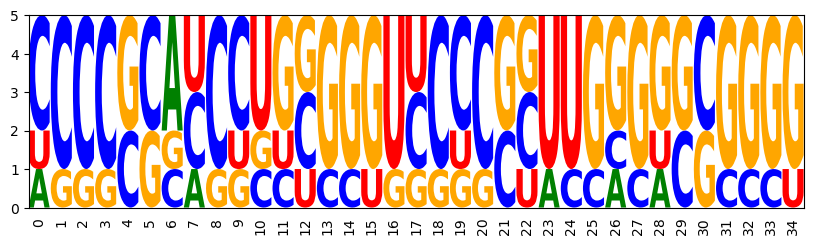

AGGGGCCAGGGGUCCUGGGGGGCACCCCUGCCCCU
CCCCGGGCCUCUCGGGUCCUCGGUUGAGGCCGGGG
CCCCCCAUCCUGGGGGUUCCCCCUUGGGGGGGGGG
UCCCGCACCCUGCGGGUCCCCGUUUGGGGGCGGGG
CCCCCGAUCCUCGGGGUUCCCCGUUGGGACGGGGG


['AGGGGCCAGGGGUCCUGGGGGGCACCCCUGCCCCU -17.6 -21.8 -19.3',
 'CCCCGGGCCUCUCGGGUCCUCGGUUGAGGCCGGGG -16.8 -20.0 -18.0',
 'CCCCCCAUCCUGGGGGUUCCCCCUUGGGGGGGGGG -16.0 -24.2 -21.5',
 'UCCCGCACCCUGCGGGUCCCCGUUUGGGGGCGGGG -19.0 -21.9 -19.3',
 'CCCCCGAUCCUCGGGGUUCCCCGUUGGGACGGGGG -15.5 -23.4 -20.1']

In [38]:
# set weights for energy targets
for k,_ in enumerate(targets):
    model.set_feature_weight(-2, f'energy{k}')

# create sampler and set target
sampler = ir.Sampler(model)
sampler.set_target(0.75*n, 0.05*n, 'gc')
samples = [sampler.targeted_sample() for _ in range(5)]

opt_draw_logo(samples)
sequences = assignments_to_seqs(samples)

# annotate sequences with energies (annotate with Turner energies only if RNA module is available)
try:
    import RNA
    sequences = ["".join([seq]+[f" {energy_of_struct(seq, target):5.1f}" for target in targets]) for seq in sequences]
except ModuleNotFoundError:
    pass

sequences

#### Target specific GC content and specific Turner energies for all targets

add Turner energy features for all target targets

In [39]:
#[add-multi-energy-features]
for k, target in enumerate(targets):
    model.add_feature(f'Energy{k}', f'energy{k}',
        lambda sample, target=target:
            energy_of_struct(rna.ass_to_seq(sample), target))
sampler = ir.Sampler(model)
sampler.set_target(0.75*n, 0.01*n, 'gc')
sampler.set_target( -15, 1, 'Energy0')
sampler.set_target( -20, 1, 'Energy1')
sampler.set_target( -20, 1, 'Energy2')

In [40]:
samples = [sampler.targeted_sample() for _ in range(5)]

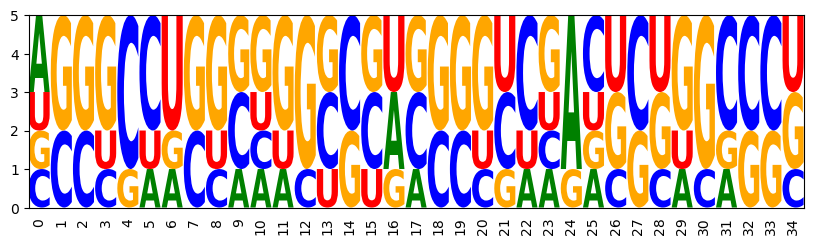

AGGGCCUGGGAGGCCCGAGGGUCGAUCCUGGCCCU
CCCCCAGCUCCUGGGGUCCCCUAUAGGGGUGGGGG
AGGGGCUGGAGGCUCUAGGGGGCGACUCCGCCCCU
GGGGCUUGGGGAGCCCAGGGGCUAGCUCUAGCCCC
UCCUCCACCCUGGGGGUCCCUCCCAAGGGGGAGGG


['AGGGCCUGGGAGGCCCGAGGGUCGAUCCUGGCCCU -14.7 -20.8 -19.8',
 'CCCCCAGCUCCUGGGGUCCCCUAUAGGGGUGGGGG -15.9 -19.6 -19.2',
 'AGGGGCUGGAGGCUCUAGGGGGCGACUCCGCCCCU -15.0 -20.9 -19.3',
 'GGGGCUUGGGGAGCCCAGGGGCUAGCUCUAGCCCC -14.3 -19.2 -20.7',
 'UCCUCCACCCUGGGGGUCCCUCCCAAGGGGGAGGG -15.2 -19.8 -20.7']

In [41]:
opt_draw_logo(samples)
sequences = assignments_to_seqs(samples)

# annotate sequences with energies
["".join([seq]+[f" {energy_of_struct(seq, target):5.1f}" for target in targets]) for seq in sequences]

### Plot dependencies and tree decomposition

In [42]:
from IPython.display import Image
import re

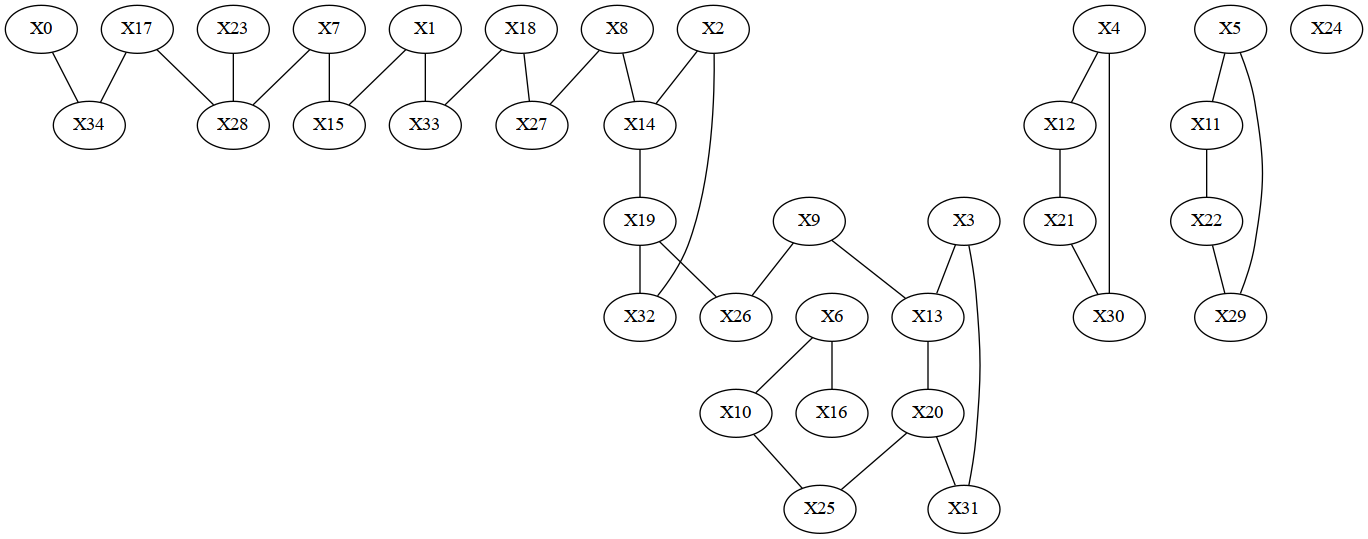

In [43]:
# Plot dependency graph

filename = 'dependency_graph.dot'
model.write_graph(filename, True)

ir.dotfile_to_png(filename)
ir.dotfile_to_pdf(filename)

filename = re.sub(r"dot$","png",filename)

Image(filename=filename,width=600)

Tree width: 2


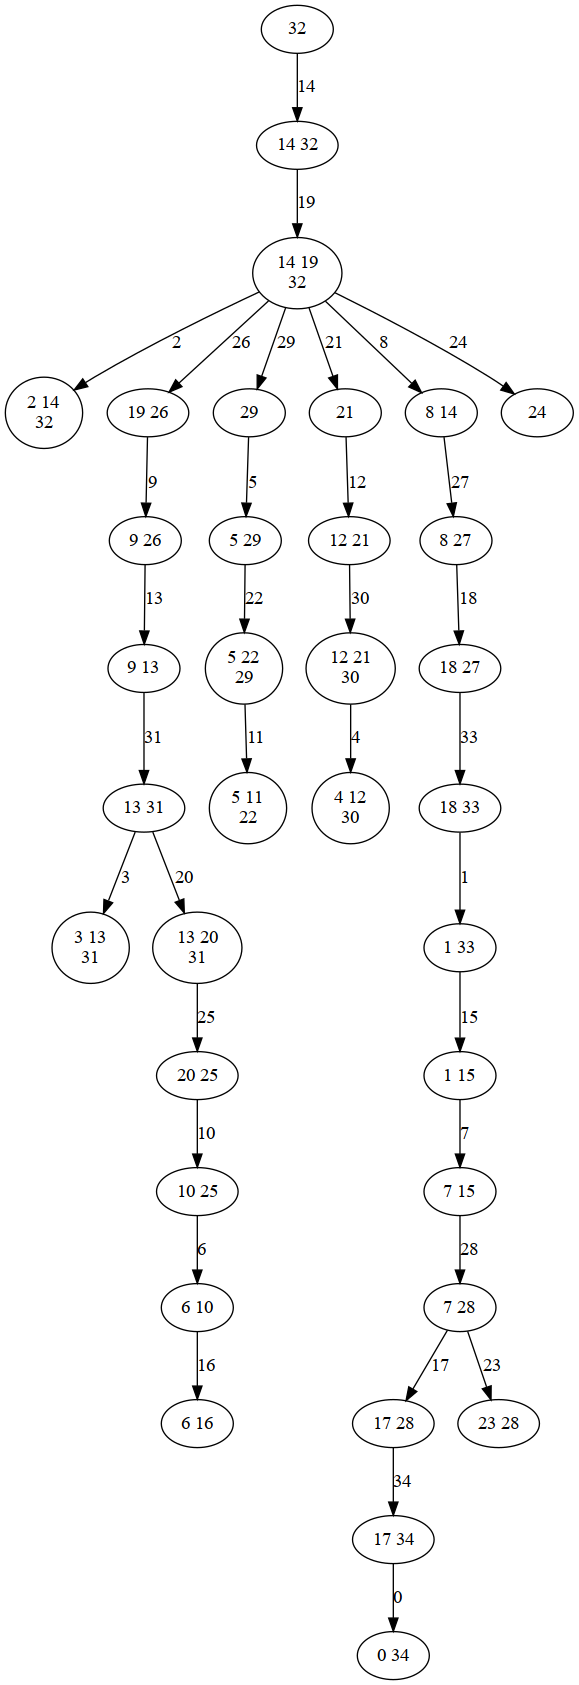

In [44]:
# Plot tree decomposition
sampler = ir.Sampler(model)
print(f"Tree width: {sampler.treewidth()}")
filename="treedecomp"
sampler.plot_td(filename,'png')
sampler.plot_td(filename,'pdf')
sampler.plot_td(filename+".dot",'dot')
Image(filename=filename+".png",width=300)

### 3.7 Negative design by sampling

In [45]:
#[3.7]
import RNA

In [46]:
target = targets[0]
n = len(target)

In [47]:
def is_mfe_design(sequence, target):
    fc = RNA.fold_compound(sequence)
    return fc.eval_structure(target) == fc.mfe()[1]

In [48]:
def single_target_design_model(target):
    n, bps = len(target), rna.parse(target)
    model = ir.Model(n, 4)
    model.add_constraints(rna.BPComp(i, j) for (i, j) in bps)
    model.add_functions([rna.GCCont(i) for i in range(n)], 'gc')
    model.add_functions([rna.BPEnergy(i, j, (i-1, j+1) not in bps)
        for (i, j) in bps], 'energy')
    model.set_feature_weight(-1.5, 'energy')
    return model

solve by direct sampling

In [49]:
sampler = ir.Sampler(single_target_design_model(target))
sampler.set_target(0.7 * n, 0.1 * n, 'gc')
for i in range(50):
    seq = rna.ass_to_seq(sampler.targeted_sample())
    if is_mfe_design(seq, target):
        print(f"{i} {seq}")

2 CUGAGGCGCCUAUGGCGGGGGCCGACCCCCCUCAG
3 GGUCGGAGGGGCCCCCUGAGCUACCGCUCCCGACC
6 GGGCGGAGGCAGGGCCUUCCCUAUCGGGGCCGCCU
7 GGGGGCGGGCUUAGCCCUCGUUAAAGCGAGCCCCC
13 CGCGGCCCGAUGUUCGGGAGCCGCUGCUCGCCGCG
17 CACCGGCCCCAAGGGGGGACGGACCCGUCCCGGUG
18 CCCUGGCCGCUAUGCGGGCGGAAUUCUGCCCAGGG


26 GGGUGGGUCCAAGGGACGCGGCAAACCGCCCACCC
28 GCGGCUAGAGUUACUCUCCGGCAUUCCGGGGCCGC
37 GGCCCUGCGGUUGCCGCCCCCCAAAGGGGAGGGCC
38 UCCUGCGCGCCGUGCGUCGAUGCCCAUCGGCGGGA
40 CGAACCCCCCUACGGGGGCGCCAGUGCGCGGUUCG
42 GCGGGGUCCGGGACGGAUGGGAGCACUCACCCCGC
46 CCCCGCGGUGUAACGCCGCCUACGCAGGUGCGGGG


In [50]:
def target_frequency(sequence, target):
    fc = RNA.fold_compound(sequence)
    fc.pf()
    return fc.pr_structure(target)

In [51]:
sampler = ir.Sampler(single_target_design_model(target))
sampler.set_target(0.7 * n, 0.1 * n, 'gc')
best = 0
for i in range(100):
    seq = rna.ass_to_seq(sampler.targeted_sample())
    freq = target_frequency(seq, target)
    if freq > best:
        best = freq
        print(f"{i} {seq} {freq:.6f}")

0 CGUGCGCCCCACAGGGGGGGGAUUACCCCCGUGCG 0.114687
5 GCCGUACGCCAUUGGCGGGGAAGUUUCUCUGCGGC 0.568546
8 GCACCCGGCCGUUGGCCGGUCGAUAGACCGGGUGC 0.929765


### 3.8 Larger single-target designs by constraint generation

RNAPOND-like negative design (generating constraints for disruptive base pairs).

In [52]:
#[3.8]
from collections import Counter

## A hard instance, eterna37
# target = "(((((.((((((.((((((.((((((.((((((.((((((....((((((......)))))).)))))).(((((...(((((((...)))))))))))).)))))).((((((((((((...)))))))...))))).))))))....))))))....))))))....)))))"

## a slightly harder instance
target = "..(((..((((.....)))).((...(((.....)))...))...))).."

n = len(target)
bps = rna.parse(target)

In [53]:
def cg_design_iteration():
    model = single_target_design_model(target)
    model.add_constraints(rna.NotBPComp(i, j) for (i, j) in dbps)
    sampler = ir.Sampler(model, lazy=True)
    if sampler.treewidth() > 10 or not sampler.is_consistent():
        return "Not found"
    ctr = Counter()
    found, sol = False, None
    for i in range(100):
        seq = rna.ass_to_seq(sampler.targeted_sample())
        fc = RNA.fold_compound(seq)
        mfe, mfe_e = fc.mfe()
        if fc.eval_structure(target) == mfe_e:
            sol = seq
        ctr.update(rna.parse(mfe))
    ndbps = [x[0] for x in ctr.most_common() if x[0] not in bps]
    dbps.extend(ndbps[:2])
    return sol
dbps, seq = [], None
while seq is None:
    seq = cg_design_iteration()
print(seq)

UACCACCGGGGCAAAUCCCCAUCGUAGGCAACAAGCUAUAGACCAUGGAG


### 3.9 Negative design by stochastic optimization with partial resampling

Define multi-target design model for resampling of subsets 

In [54]:
#[3.9]
import RNA
targets = ["((((((((((...))))((((....))))))))))",
           "((((((.((((((((....))))..))))))))))",
           ".((((((...)))))).(((((((....)))))))"]

In [55]:
#[multi-defect]
def multi_defect(sequence, targets, xi=1):
    k = len(targets)
    fc = RNA.fold_compound(sequence)
    ee = fc.pf()[1]
    eos = [fc.eval_structure(target) for target in targets]
    diff_ee = sum(1/k * (eos[i] - ee) for i in range(k))
    diff_targets = sum(2/(k*(k-1)) * abs(eos[i]-eos[j])
        for i in range(k) for j in range(k) if i<j)
    return diff_ee + xi * diff_targets

In [56]:
import random
import math

Optimize an ojective function by a Monte-Carlo optimization strategy with model resampling

In [57]:
#[mc-optimize]
def mc_optimize(model, objective, steps, temp, start=None):
    sampler = ir.Sampler(model)
    cur = sampler.sample() if start is None else start
    curval = objective(cur)
    best, bestval = cur, curval
    
    ccs = model.connected_components()
    weights = [1/len(cc) for cc in ccs]
    
    for i in range(steps):
        cc = random.choices(ccs,weights)[0]
        new = sampler.resample(cc, cur)
        newval = objective(new)
        if (newval >= curval
            or random.random() <= math.exp((newval-curval)/temp)):
            cur, curval = new, newval
            if curval > bestval:
                best, bestval = cur, curval

    return (best, bestval)

In [58]:
#[mc-multi-design-model]
n = len(targets[0])
model = ir.Model(n, 4)
model.add_functions([rna.GCCont(i) for i in range(n)], 'gc')
for target in targets:
    ss = rna.parse(target)
    model.add_constraints(rna.BPComp(i, j) for (i, j) in ss)
    model.add_functions([rna.BPEnergy(i, j, (i-1, j+1) not in ss)
        for (i, j) in ss], 'energy')
model.set_feature_weight(-0.8, 'energy')
model.set_feature_weight(-0.3, 'gc')

In [59]:
best, best_val = mc_optimize(model,
    lambda x: - multi_defect(rna.ass_to_seq(x),targets,1),
    1000, 0.01)

print(rna.ass_to_seq(best), - best_val)

GGGGUGCGGGGUACCCGGGGGUAGUCCCCUACCCC 2.445469538370768


### 3.10 A real world example: design of a Tandem-Riboswitch

In [60]:
#[3.10]
seqTheo0 = "AAGUGAUACCAGCAUCGUCUUGAUGCCCUUGGCAGCACUUCAGAAAUCUC"\
           "UGAAGUGCUGUUUUUUUU"
seqTet0  = "GGCCUAAAACAUACCAGAGAAAUCUGGAGAGGUGAAGAAUACGACCACCU"\
           "AGGCCGACAGUGGCCUAGGUGGUCGUUUUUUUUU"

In [61]:
seqTheo  = "NNNNGAUACCAGCAUCGUCUUGAUGCCCUUGGCAGCNNNNNNNNNNNNNN"\
           "NNNNNNNNNNUUUUUUUU"
aptTheo  = "(((((...((((((((.....)))))...)))...))))).........."\
           ".................."
termTheo = "...............................(((((((((((((....))"\
           ")))))))))))......."


seqTet   = "NNNNNAAAACAUACCAGAGAAAUCUGGAGAGGUGAAGAAUACGACCACCU"\
           "ANNNNNNNNNNNNNNNNNNNNNNNNUUUUUUUUU"
termTet  = "........................................(((((((((("\
           "(((((......)))))))))))))))........"
aptTet   = "((((((.......(((((....)))))...((((...........)))))"\
           ")))))............................."

In [62]:
spacerLen = 30
aptamers    = aptTheo  + "."*spacerLen + aptTet
terminators = termTheo + "."*spacerLen + termTet
sequence    = seqTheo  + "N"*spacerLen + seqTet

In [63]:
n = len(aptTheo) + spacerLen + len(aptTet)
variants = dict(
    empty = '.'*n,
    aptTheo = aptTheo + '.'*(n-len(aptTheo)),
    aptTet = '.'*(n-len(aptTet)) + aptTet,
    termTheo = termTheo + '.'*(n-len(aptTheo)),
    termTet = '.'*(n-len(aptTet)) + termTet,
    spacer = '.'*len(aptTheo) + 'x'*spacerLen + '.'*len(aptTet)
)

In [64]:
def constrained_efe(sequence,c):
    fc = RNA.fold_compound(sequence)
    fc.hc_add_from_db(c)
    return fc.pf()[1]

def rstd_objective(sequence):
    efe = {k:constrained_efe(sequence,variants[k]) 
           for k in variants}
        
    term_stability = efe['termTheo'] + efe['termTet'] \
        - 2*efe['empty']
    apt_target = abs(efe['aptTheo']-efe['empty']-7) \
        + abs(efe['aptTet']-efe['empty']-10)
    spacer_unfolding = efe['spacer']-efe['empty']

    return term_stability + apt_target + spacer_unfolding

In [65]:
rstd_targets = [aptamers, terminators]
n = len(rstd_targets[0])
model = ir.Model(n, 4)

for i, x in enumerate(sequence):
    model.add_constraints(ir.ValueIn(i, rna.iupacvalues(x)))

model.add_functions([rna.GCCont(i) for i in range(n)], 'gc')

for k,target in enumerate(rstd_targets):
    ss = rna.parse(target)
    model.add_constraints(rna.BPComp(i, j) for (i, j) in ss)
    model.add_functions([rna.BPEnergy(i, j, (i-1, j+1) not in ss)
        for (i, j) in ss], f'energy{k}')
model.set_feature_weight(-0.6, 'energy0')
model.set_feature_weight(-1, 'energy1')
model.set_feature_weight(-0.3, 'gc')

In [66]:
#[rstd-optimize-call]
objective = lambda x: -rstd_objective(rna.ass_to_seq(x))
best, best_val = ir.mc_optimize(model, objective,
                                steps = 500, temp = 0.03)
print(rna.ass_to_seq(best), -best_val)

CGAGGAUACCAGCAUCGUCUUGAUGCCCUUGGCAGCCUUGCCACUUAUGUGGCGAGGUUGUUUUUUUUAAUAUAUCAGAGCUUUUUUUUAAUAAUCGCAGCCUAAAACAUACCAGAGAAAUCUGGAGAGGUGAAGAAUACGACCACCUAGGUUGGAAAGGGCCUGGGUGGUUGUUUUUUUUU 1.2818794250488281


#### Run optimzation in parallel

In [67]:
import concurrent.futures

steps = 500
jobs = 12

def my_rstd_optimize(i):
    random.seed(None)
    objective = lambda x: -rstd_objective(rna.ass_to_seq(x))
    best,best_val = mc_optimize(model, objective, steps = steps, temp = 0.03)
    return rna.ass_to_seq(best), -best_val

with concurrent.futures.ProcessPoolExecutor() as executor:
    res = executor.map(my_rstd_optimize, range(jobs))
res = list(res)

In [68]:
for seq, val in res:
    print(f"{seq} {val:.2f}")
    fc = RNA.fold_compound(seq)
    for k,c in variants.items():
        print(f"{k:20} {fc.eval_structure(c):8.2f} {constrained_efe(seq,c):8.2f} {constrained_efe(seq,c)-constrained_efe(seq,variants['empty']):8.2f}")

GUUUGAUACCAGCAUCGUCUUGAUGCCCUUGGCAGCGGGCGUGGAACUCCGCGUCCGUUGUUUUUUUUGAUGACCGCAAUAAUCCUCAUACGUAGCAACGGGUAAAACAUACCAGAGAAAUCUGGAGAGGUGAAGAAUACGACCACCUACCUGCUGGUACGGGUAGGUGGUCGUUUUUUUUU 3.91
empty                    0.00   -76.32     0.00
aptTheo                -11.90   -69.34     6.98
aptTet                 -15.40   -66.46     9.87


termTheo               -23.10   -76.31     0.01
termTet                -28.20   -76.32     0.00


spacer                   0.00   -72.58     3.74
GUUUGAUACCAGCAUCGUCUUGAUGCCCUUGGCAGCGGGCGCAGUCCCCUGCGUCCGUUGUUUUUUUUGUCAGCAUAGUAAGUAAAAUAAUGUAAUCGCGGGUAAAACAUACCAGAGAAAUCUGGAGAGGUGAAGAAUACGACCACCUACCCGCGUUUACGGGUGGGUGGUUGUUUUUUUUU 4.30
empty                    0.00   -74.90     0.00


aptTheo                -11.90   -67.57     7.33
aptTet                 -17.60   -63.58    11.32


termTheo               -23.00   -74.87     0.03
termTet                -28.00   -74.90     0.00
spacer                   0.00   -72.29     2.61
GUUCGAUACCAGCAUCGUCUUGAUGCCCUUGGCAGCGGGCGUCGGCAACGACGUCCGUUGUUUUUUUUUUGGACAACGAUACUUAAAUACGGAAAUGGCGGGUAAAACAUACCAGAGAAAUCUGGAGAGGUGAAGAAUACGACCACCUACCUGCGAGUACGGGUAGGUGGUCGUUUUUUUUU 3.97
empty                    0.00   -76.22     0.00


aptTheo                -13.90   -69.66     6.57
aptTet                 -15.40   -66.17    10.06


termTheo               -23.90   -76.16     0.07
termTet                -28.20   -76.22     0.00


spacer                   0.00   -72.81     3.41
GUUCGAUACCAGCAUCGUCUUGAUGCCCUUGGCAGCGGGCGCACAACCGUGCGUCCGUUGUUUUUUUUCUUGACAGCGCGCUUGAAAUACGGUAAUUACUGGUAAAACAUACCAGAGAAAUCUGGAGAGGUGAAGAAUACGACCACCUACCGGCAAUUACUGGUAGGUGGUUGUUUUUUUUU 3.90
empty                    0.00   -75.42     0.00


aptTheo                -13.90   -68.35     7.06
aptTet                 -15.40   -65.48     9.94


termTheo               -23.60   -75.40     0.02
termTet                -26.10   -75.42     0.00


spacer                   0.00   -71.67     3.75
GUUUGAUACCAGCAUCGUCUUGAUGCCCUUGGCAGCGGACCGUUUGCAAACGGUCCGCUGUUUUUUUUAUAUAAUUUAAAUAACCGCGGAAAGUCUCAUUUGUAAAACAUACCAGAGAAAUCUGGAGAGGUGAAGAAUACGACCACCUACGGGUGCUAUUCUGUGGGUGGUUGUUUUUUUUU 3.21


empty                    0.00   -70.64     0.00


aptTheo                -11.50   -63.07     7.57


aptTet                 -10.00   -60.69     9.95


termTheo               -24.00   -70.59     0.05


termTet                -23.90   -70.63     0.00
spacer                   0.00   -68.10     2.54
GGUUGAUACCAGCAUCGUCUUGAUGCCCUUGGCAGCGGCCCGCCCUUAGGCGGGCUGCUGUUUUUUUUAAUAUAUUCAUACUAAACGCAACUAGCACUCGCUUAAAACAUACCAGAGAAAUCUGGAGAGGUGAAGAAUACGACCACCUAAGCGAGAGGGCGCUUAGGUGGUUGUUUUUUUUU 3.35


empty                    0.00   -78.81     0.00
aptTheo                -13.80   -71.58     7.23


aptTet                 -15.60   -68.97     9.84


termTheo               -28.30   -78.79     0.02
termTet                -26.10   -78.80     0.00
spacer                   0.00   -75.86     2.94
GGAAGAUACCAGCAUCGUCUUGAUGCCCUUGGCAGCUUCCGUAGAAAGCUGCGGAGGCUGUUUUUUUUACACGAAUACAUGACUUUUAUUGACCUAACGCGCUAAAACAUACCAGAGAAAUCUGGAGAGGUGAAGAAUACGACCACCUAGUGCGGCUAGGUACUAGGUGGUCGUUUUUUUUU 2.11
empty                    0.00   -72.60     0.00


aptTheo                -15.70   -65.60     7.00
aptTet                 -16.20   -62.70     9.90


termTheo               -22.40   -72.56     0.04
termTet                -28.30   -72.60     0.00
spacer                   0.00   -70.63     1.97
CCGUGAUACCAGCAUCGUCUUGAUGCCCUUGGCAGCGCGGGUGCGAUGGCAUUCGCGCUGUUUUUUUUCACAAACAAUUAUUGCUAAUCUGGAUACAAGGCGUAAAACAUACCAGAGAAAUCUGGAGAGGUGAAGAAUACGACCACCUACGCCCAGAAUGGCGUAGGUGGUUGUUUUUUUUU 5.06
empty                    0.00   -76.41     0.00


aptTheo                -16.20   -69.48     6.93
aptTet                 -17.60   -65.93    10.48
termTheo               -24.20   -76.21     0.20


termTet                -28.10   -76.39     0.02
spacer                   0.00   -72.12     4.29
UUCGGAUACCAGCAUCGUCUUGAUGCCCUUGGCAGCUGGAACGUAUGAACGUUCCAGUUGUUUUUUUUUUACUACAUACCCACGCGGUUCUCAAAAAACGACUAAAACAUACCAGAGAAAUCUGGAGAGGUGAAGAAUACGACCACCUAGUCGUUAUGCCGACUGGGUGGUCGUUUUUUUUU 3.29


empty                    0.00   -71.18     0.00
aptTheo                -11.90   -64.15     7.02


aptTet                 -15.50   -61.15    10.03
termTheo               -20.40   -71.08     0.09
termTet                -27.90   -71.17     0.01
spacer                   0.00   -68.04     3.13
CGCCGAUACCAGCAUCGUCUUGAUGCCCUUGGCAGCGGCGGUCGACGGCGGCCGCCGCUGUUUUUUUUCUAUCUUCAAACACAAUACCCAGCGCAUCCCGUAUAAAACAUACCAGAGAAAUCUGGAGAGGUGAAGAAUACGACCACCUAUGCGGUGCAAUGCAUGGGUGGUCGUUUUUUUUU 2.03


empty                    0.00   -77.03     0.00
aptTheo                -18.10   -69.93     7.10
aptTet                 -13.80   -67.04     9.99
termTheo               -27.20   -76.77     0.26


termTet                -26.80   -77.02     0.00
spacer                   0.00   -75.38     1.65
CCCUGAUACCAGCAUCGUCUUGAUGCCCUUGGCAGCGGGGGCGGUGACCCGCCUCCGCUGUUUUUUUUUAACAUGAUUCAAACAGAUGGACCGCGAACCCAGUAAAACAUACCAGAGAAAUCUGGAGAGGUGAAGAAUACGACCACCUAUUGGGCAGGUCCAGUAGGUGGUUGUUUUUUUUU 3.60
empty                    0.00   -75.76     0.00
aptTheo                -16.70   -68.81     6.95


aptTet                 -14.20   -66.07     9.69
termTheo               -27.40   -75.65     0.12


termTet                -24.90   -75.76     0.00
spacer                   0.00   -72.64     3.13
GCCCGAUACCAGCAUCGUCUUGAUGCCCUUGGCAGCGGGCCGCCGAGAGGCGGUCCGUUGUUUUUUUUCCAGCAUAAAACGUAGCCAUCUUCAGCCAGGUCAUAAAACAUACCAGAGAAAUCUGGAGAGGUGAAGAAUACGACCACCUAUGGCUCACUGGCCAUAGGUGGUCGUUUUUUUUU 5.19
empty                    0.00   -80.78     0.00


aptTheo                -18.50   -73.78     6.99
aptTet                 -13.50   -70.20    10.58


termTheo               -26.70   -80.15     0.63
termTet                -29.00   -80.77     0.00


spacer                   0.00   -76.81     3.97


## APPENDIX

### Generate RNAPOND figures

In [69]:
#[APPENDIX]
from collections import Counter

## a slightly harder instance
target = "..(((..((((.....)))).((...(((.....)))...))...))).."

n = len(target)
bps = rna.parse(target)
steps = 100

In [70]:
import matplotlib.patches as patches
import matplotlib.cm as cm
import numpy as np
import seaborn as sns

tick = list(range(0,n,5))
cmap = sns.light_palette((260, 75, 60), input="husl", as_cmap=True)

# Function to draw base pair counts for each sampling
def draw_heatmap(ax, counter, bps, dbps, new_dbps, vmax, steps=steps, cbar=True):
    # Initial count matrix
    counts = np.zeros((n,n))
    mask = np.tri(counts.shape[0], k=-1)
    for bp, count in counter.items():
        counts[bp[0]][bp[1]] = count
    # Normalization
    counts = counts/steps

    sns.heatmap(counts, vmax=vmax/steps, mask=mask, square=True, cmap=cmap, ax=ax, cbar=cbar)
    for i, j in bps:
        ax.add_patch(patches.Rectangle((j,i), 1, 1, fc="none", ec="blue", lw=1))
    for i, j in dbps:
        ax.add_patch(patches.Rectangle((j,i), 1, 1, fc="none", ec="red", lw=1))
    for i, j in new_dbps:
        ax.add_patch(patches.Rectangle((j,i), 1, 1, fc="none", ec="green", lw=1))

    ax.xaxis.tick_top()
    ax.yaxis.tick_right()
    ax.set_xticks(tick)
    ax.set_xticklabels(tick)
    ax.set_yticks(tick)
    ax.set_yticklabels(tick)

In [71]:
def cg_design_iteration():
    model = single_target_design_model(target)
    model.add_constraints(rna.NotBPComp(i, j) for (i, j) in dbps)
    sampler = ir.Sampler(model, lazy=True)
    if sampler.treewidth() > 10 or not sampler.is_consistent():
        return "Not found"
    ctr = Counter()
    found, sol = False, None
    for i in range(steps):
        seq = rna.ass_to_seq(sampler.targeted_sample())
        fc = RNA.fold_compound(seq)
        mfe, mfe_e = fc.mfe()
        if fc.eval_structure(target) == mfe_e:
            found, sol = True, seq
        ctr.update(rna.parse(mfe))
    ndbps = [x[0] for x in ctr.most_common() if x[0] not in bps]
    dbps.extend(ndbps[:2])
    if found:
        records.append((ctr, dbps[:], []))
    else:
        records.append((ctr, dbps[:], ndbps[:2]))
    return found, sol

# One can use seed() provided by infrared to reproduce the result
random.seed(1000)
found, records, dbps, seq = False, [], [], None
while not found: found, seq = cg_design_iteration()
print(seq)

UGCCGAGCCCGGAAAACGGGGAGAUUGCGCCAGUCGCUAGCUAUGCGGGA


In [72]:
to_draw = [records[i] for i in [0, 1, -1]]
vmax = max(map(lambda t: max(t[0].values()), to_draw))

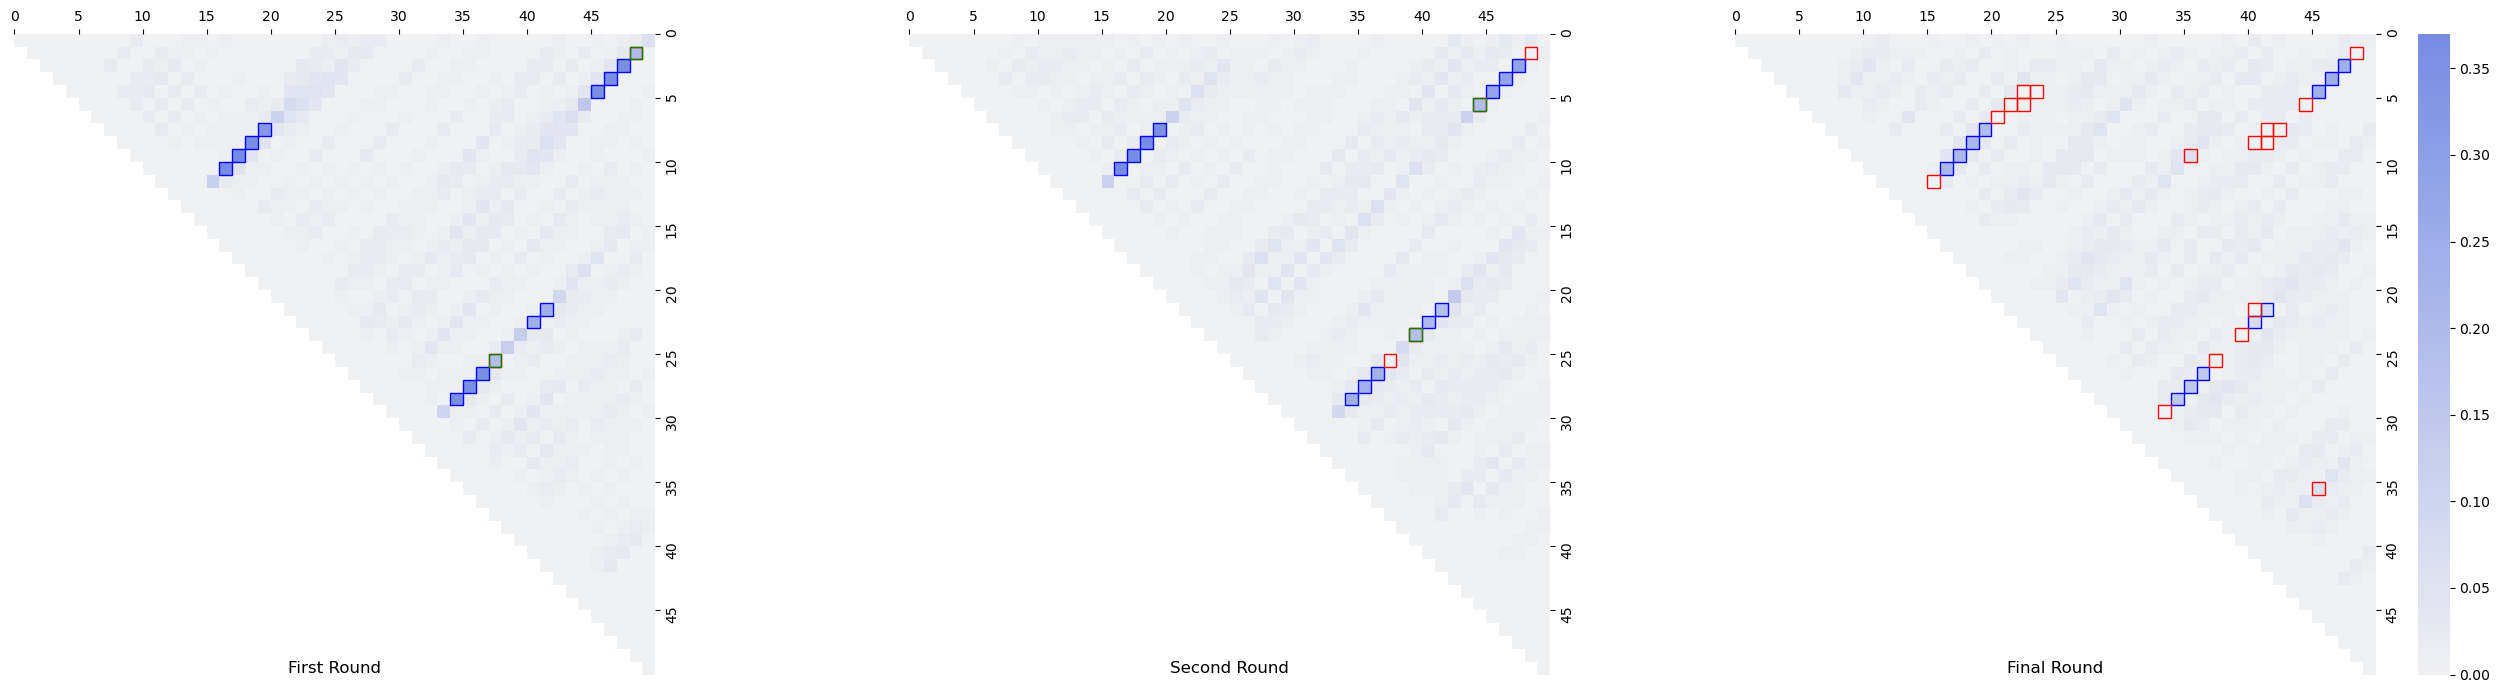

In [73]:
fig, axs = plt.subplots(1,3, figsize=(27,7))
fig.tight_layout()
for i in range(3):
    ax = axs[i]
    counter, disruptive, new_dbps = to_draw[i]
    draw_heatmap(ax, counter, bps, disruptive, new_dbps, vmax, steps=100, cbar=i==2)

axs[0].set_title('First Round', y=-0.01)
axs[1].set_title('Second Round', y=-0.01)
axs[2].set_title('Final Round', y=-0.01)

plt.savefig('count_matrix.pdf', dpi=200, bbox_inches='tight')
plt.show()

### Generate stochastic optimization figure

In [74]:
import concurrent.futures

def mc_optimize_allsteps(model, objective, steps, temp, start=None):
    res = list()

    sampler = ir.Sampler(model)
    cur = sampler.sample() if start is None else start
    curval = objective(cur)
    best, bestval = cur, curval
    res.append((rna.ass_to_seq(best),bestval))
    
    ccs = model.connected_components()
    weights = [1/len(cc) for cc in ccs]
    
    for i in range(steps):
        cc = random.choices(ccs,weights)[0]
        new = sampler.resample(cc, cur)
        newval = objective(new)
        if (newval >= curval
            or random.random() <= math.exp((newval-curval)/temp)):
            cur, curval = new, newval
            if curval > bestval:
                best, bestval = cur, curval
        res.append((rna.ass_to_seq(best),bestval))

    return res

n = len(targets[0])
model = ir.Model(n, 4)
model.add_functions([rna.GCCont(i) for i in range(n)], 'gc')
for target in targets:
    ss = rna.parse(target)
    model.add_constraints(rna.BPComp(i, j) for (i, j) in ss)
    model.add_functions([rna.BPEnergy(i, j, (i-1, j+1) not in ss)
        for (i, j) in ss], 'energy')
model.set_feature_weight(-0.8, 'energy')
model.set_feature_weight(-0.3, 'gc')

objective = lambda x: - multi_defect(rna.ass_to_seq(x),targets,1)

def my_mc_optimize_allsteps(i):
    random.seed(None)
    res = mc_optimize_allsteps(model,objective,6400,0.01)
    return [(b,-v) for b,v in res]

with concurrent.futures.ProcessPoolExecutor() as executor:
    res = executor.map(my_mc_optimize_allsteps, range(48))
res = list(res)

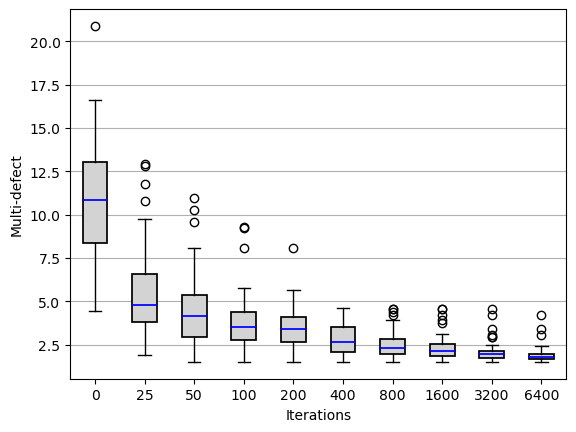

In [75]:
the_steps = [0]+[25*(2**i) for i in range(8+1)]
res2 = [[r[steps][1] for r in res] for steps in the_steps]
#print(res2)
fig, ax = plt.subplots()
box = ax.boxplot(res2,
                 labels=the_steps,
                 patch_artist=True,
                 boxprops=dict(facecolor='lightgrey',linewidth=1.25),
                 medianprops=dict(color='blue', linewidth=1.25)
                )
ax.set_ylabel("Multi-defect")
ax.set_xlabel("Iterations")
ax.yaxis.grid(True)
plt.savefig("optimization.svg")